# Group Project Proposal

## Title: Classification Model to Predict Fraudulent Firms Based on Audit Data

## Introduction

## Preliminary Exploratory Data Analysis

#### Loading the necessary libraries into the Jupyter Notebook:

In [34]:
# loaded the necessary libraries
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library(magrittr)

#### Reading the dataset can be read from the web into R:

In [13]:
# demonstrate how the data is read into R 
audit <- read_csv("audit_data/audit_risk.csv") |> mutate(Risk = as_factor(Risk)) 
head(audit)

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0



#### Cleaning and wrangling the data into a tidy format:

In [26]:
# cleaning and wrangling the data into a tidy format: tidying the column names
colnames(audit) %<>% tolower
head(audit)

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,risk_e,history,prob,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0


#### Taking a glimpse of the number of observations in each class:

In [27]:
# taking a glimpse of the data set
glimpse(audit)

Rows: 776
Columns: 27
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "23", "6", "6", "6", "6", "6", "7", "8", "8", "8", "8",…
$ para_a         <dbl> 4.18, 0.00, 0.51, 0.00, 0.00, 0.00, 1.10, 8.50, 8.40, 3…
$ score_a        <dbl> 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, …
$ risk_a         <dbl> 2.508, 0.000, 0.102, 0.000, 0.000, 0.000, 0.440, 5.100,…
$ para_b         <dbl> 2.50, 4.83, 0.23, 10.80, 0.08, 0.83, 7.41, 12.03, 11.05…
$ score_b...7    <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.4, 0.6, 0.6, 0.2, 0.6, …
$ risk_b         <dbl> 0.500, 0.966, 0.046, 6.480, 0.016, 0.166, 2.964, 7.218,…
$ total          <dbl> 6.68, 4.83, 0.74, 10.80, 0.08, 0.83, 8.51, 20.53, 19.45…
$ numbers        <dbl> 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, …
$ score_b...11   <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, …
$ risk_c         <dbl> 1.0, 1.0, 1.0, 3.6, 1.0, 1.0, 1.0, 2.2, 2.2, 1.0, 1.0, …
$ money_value    <

#### Splitting the data set into training and test sets:

In [28]:
# split the audit data into training and test set
audit_split <- initial_split(audit, prop = 0.75, strata = risk)

audit_training <- training(audit_split)

audit_testing <- testing(audit_split)

#### Viewing and taking a glimpse of the training data set:

In [29]:
# split the audit data into training and test set
head(audit_training)
glimpse(audit_training)

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,risk_e,history,prob,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.5540,0.4,0.5,0.51080,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.5480,0.4,0.5,0.30960,0
3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5,⋯,0.4,0,0.2,0,2.4,4.3720,0.4,0.5,0.87440,0
3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,5,⋯,0.4,0,0.2,0,2.2,1.9060,0.4,0.5,0.38120,0
3.89,8,0.00,0.2,0.000,0.84,0.2,0.168,0.84,5,⋯,0.4,0,0.2,0,2.0,1.5694,0.4,0.5,0.31388,0
3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,5,⋯,0.4,0,0.2,0,2.2,2.3300,0.4,0.5,0.46600,0


Rows: 581
Columns: 27
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "6", "6", "8", "8", "8", "37", "3", "3", "37", "5", "5"…
$ para_a         <dbl> 0.00, 0.51, 3.98, 1.09, 0.00, 1.81, 0.02, 0.94, 0.00, 0…
$ score_a        <dbl> 0.2, 0.2, 0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ risk_a         <dbl> 0.000, 0.102, 2.388, 0.436, 0.000, 0.724, 0.004, 0.188,…
$ para_b         <dbl> 4.83, 0.23, 0.99, 0.35, 0.84, 1.03, 5.94, 0.01, 0.75, 1…
$ score_b...7    <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, …
$ risk_b         <dbl> 0.966, 0.046, 0.198, 0.070, 0.168, 0.206, 2.376, 0.002,…
$ total          <dbl> 4.83, 0.74, 4.97, 1.44, 0.84, 2.84, 5.96, 0.95, 0.75, 1…
$ numbers        <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5…
$ score_b...11   <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ risk_c         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ money_value    <

#### Viewing and taking a glimpse of the testing data set:

In [30]:
# split the audit data into training and test set
head(audit_testing)
glimpse(audit_testing)

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,risk_e,history,prob,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,⋯,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,⋯,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,⋯,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,⋯,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
3.89,8,15.38,0.6,9.228,40.14,0.6,24.084,55.52,5.0,⋯,0.8,1,0.4,0.4,4.0,35.704,1.2,0.5,21.4224,1
3.89,8,5.47,0.6,3.282,7.63,0.4,3.052,13.10,5.0,⋯,0.4,1,0.4,0.4,3.6,14.392,0.8,0.5,5.7568,1


Rows: 195
Columns: 27
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "6", "6", "6", "8", "8", "8", "13", "3", "4", "4", "14"…
$ para_a         <dbl> 0.00, 0.00, 0.00, 8.50, 15.38, 5.47, 1.95, 5.31, 7.42, …
$ score_a        <dbl> 0.2, 0.2, 0.2, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.2, 0.6, …
$ risk_a         <dbl> 0.000, 0.000, 0.000, 5.100, 9.228, 3.282, 0.780, 3.186,…
$ para_b         <dbl> 10.80, 0.08, 0.83, 12.03, 40.14, 7.63, 9.01, 22.79, 2.2…
$ score_b...7    <dbl> 0.6, 0.2, 0.2, 0.6, 0.6, 0.4, 0.4, 0.6, 0.2, 0.2, 0.6, …
$ risk_b         <dbl> 6.480, 0.016, 0.166, 7.218, 24.084, 3.052, 3.604, 13.67…
$ total          <dbl> 10.80, 0.08, 0.83, 20.53, 55.52, 13.10, 10.96, 28.10, 9…
$ numbers        <dbl> 6.0, 5.0, 5.0, 5.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, …
$ score_b...11   <dbl> 0.6, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ risk_c         <dbl> 3.6, 1.0, 1.0, 2.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, …
$ money_value    <

#### Using only training data and summarize the data in one table with the chosen predictor variables:

In [33]:
# summarizing the training data--selecting the chosen predictor variables
audit_training <- audit_training |> select(total, money_value, district_loss, history, 
                                           score, inherent_risk, control_risk, 
                                           detection_risk, audit_risk, risk)

glimpse(audit_training)
head(audit_training)

Rows: 581
Columns: 10
$ total          <dbl> 4.83, 0.74, 4.97, 1.44, 0.84, 2.84, 5.96, 0.95, 0.75, 1…
$ money_value    <dbl> 0.940, 0.000, 1.930, 0.000, 0.007, 0.000, 0.010, 0.100,…
$ district_loss  <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ history        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ score          <dbl> 2.0, 2.0, 2.4, 2.2, 2.0, 2.2, 2.6, 2.0, 2.2, 2.0, 2.0, …
$ inherent_risk  <dbl> 2.5540, 1.5480, 4.3720, 1.9060, 1.5694, 2.3300, 3.7820,…
$ control_risk   <dbl> 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, …
$ detection_risk <dbl> 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, …
$ audit_risk     <dbl> 0.51080, 0.30960, 0.87440, 0.38120, 0.31388, 0.46600, 0…
$ risk           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


total,money_value,district_loss,history,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4.83,0.940,2,0,2.0,2.5540,0.4,0.5,0.51080,0
0.74,0.000,2,0,2.0,1.5480,0.4,0.5,0.30960,0
4.97,1.930,2,0,2.4,4.3720,0.4,0.5,0.87440,0
1.44,0.000,2,0,2.2,1.9060,0.4,0.5,0.38120,0
0.84,0.007,2,0,2.0,1.5694,0.4,0.5,0.31388,0
2.84,0.000,2,0,2.2,2.3300,0.4,0.5,0.46600,0


#### Using only training data and visualize the data with three plots relevant to the analysis:

Since we prefer 2-D plots for visualization, we choose three variables to help visualize for each plot:

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


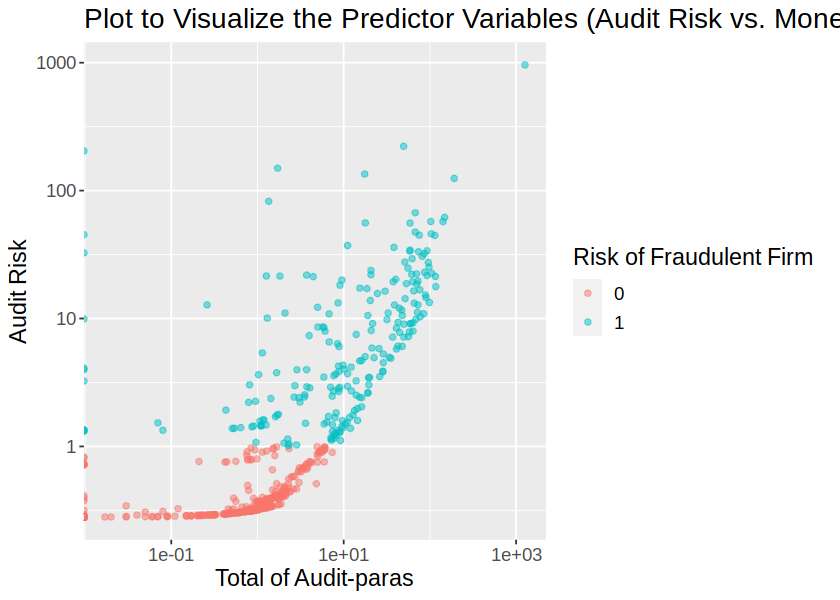

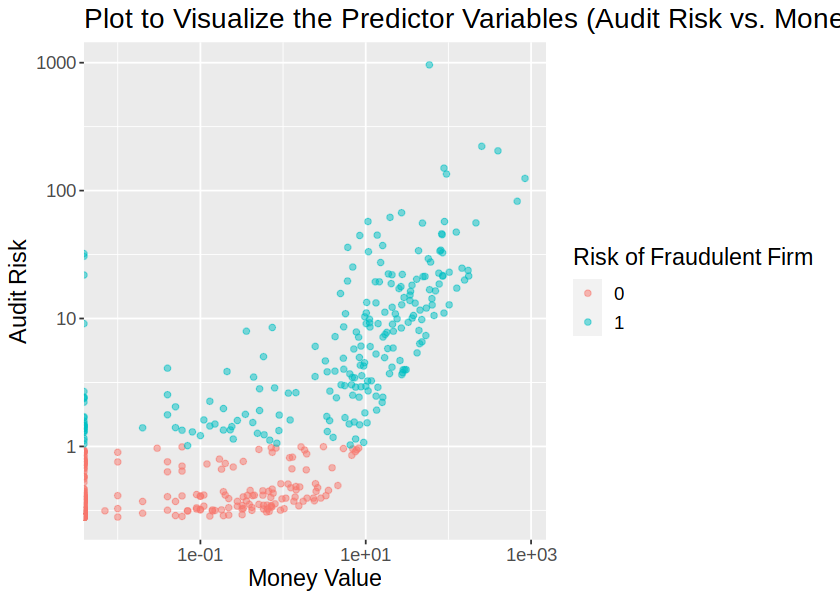

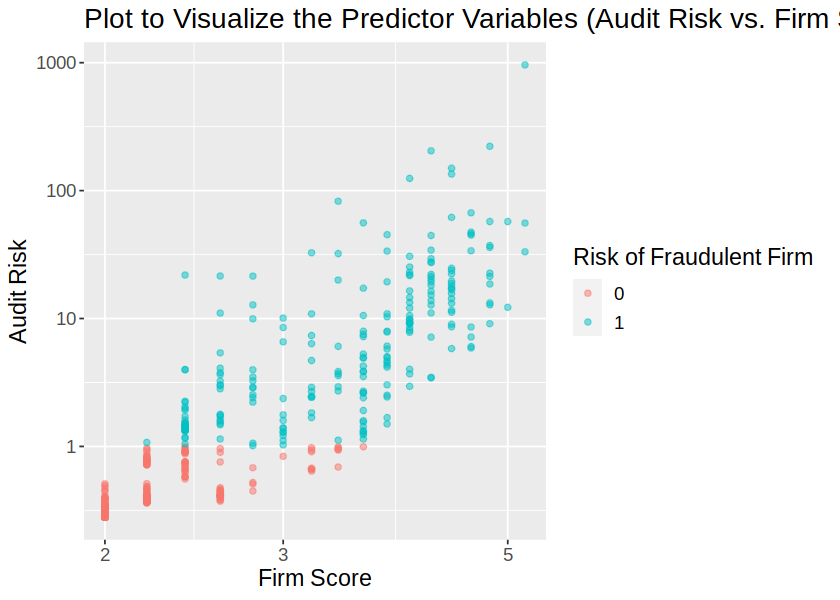

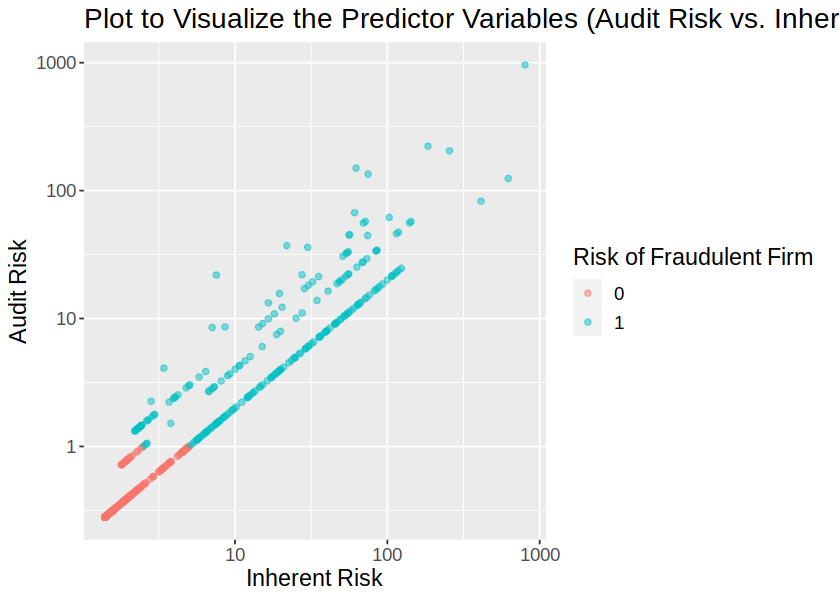

In [32]:
# using scatter plots to visualize
options(repr.plot.width = 7, repr.plot.height = 5)

audit_training_plot0 <- audit_training |> ggplot(aes(x = total, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Total of Audit-paras", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Money Value)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 14))
audit_training_plot0

audit_training_plot1 <- audit_training |> ggplot(aes(x = money_value, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Money Value", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Money Value)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 14))
audit_training_plot1

audit_training_plot2 <- audit_training |> ggplot(aes(x = score, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Firm Score", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Firm Score)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 14))
audit_training_plot2

audit_training_plot3 <- audit_training |> ggplot(aes(x = inherent_risk, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Inherent Risk", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Inherent Risk)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 14))
audit_training_plot3

## Methods

## Expected Outcomes and Significance